<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


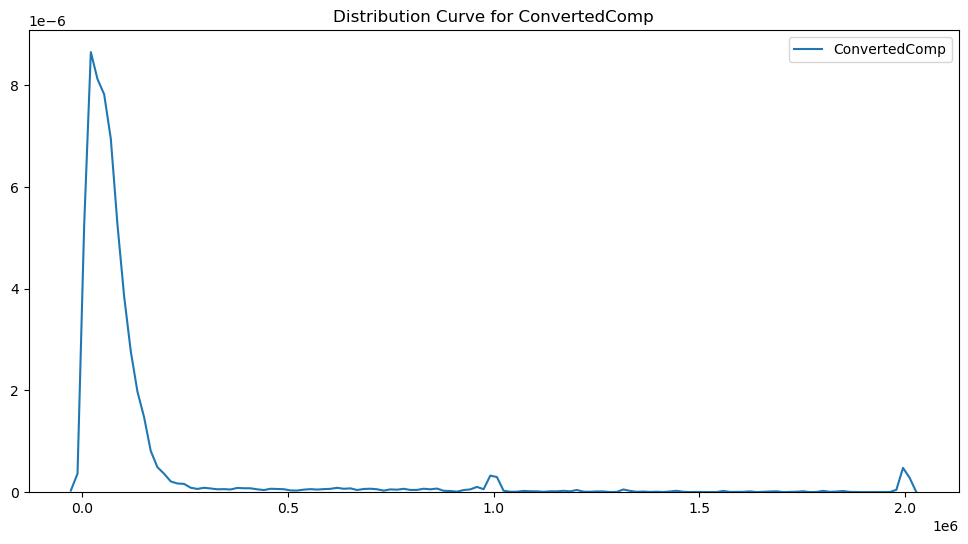

In [3]:
# Plot de la distribution curve pour la colonne ConvertedComp
plt.figure(figsize=(12, 6))
sns.kdeplot(df['ConvertedComp'])
plt.title('Distribution Curve for ConvertedComp')
plt.show()

Plot the histogram for the column `ConvertedComp`.


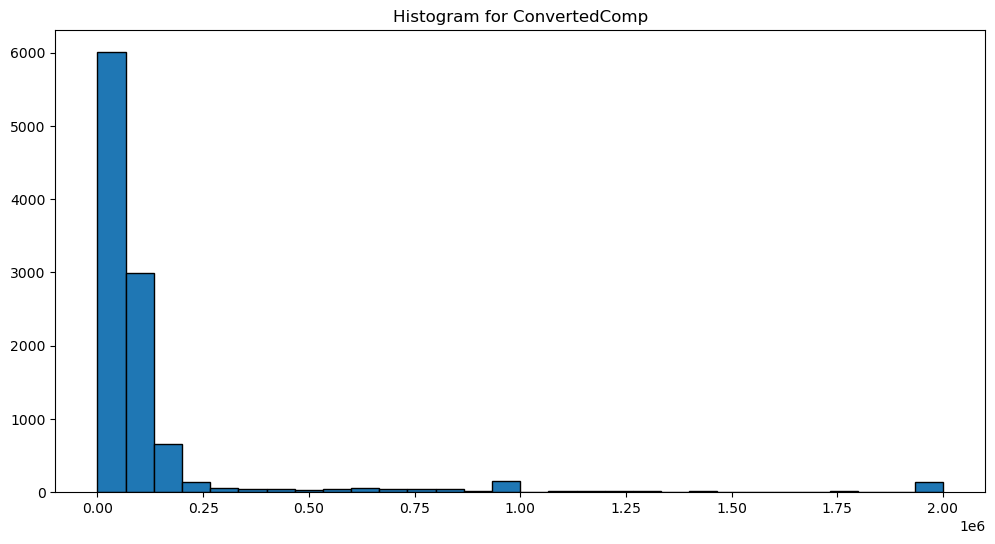

In [6]:
# Plot de l'histogramme pour la colonne ConvertedComp
plt.figure(figsize=(12, 6))
plt.hist(df['ConvertedComp'], bins=30, edgecolor='black')
plt.title('Histogram for ConvertedComp')
plt.show()

What is the median of the column `ConvertedComp`?


In [7]:
# Médiane de la colonne ConvertedComp
median_ConvertedComp = df['ConvertedComp'].median()
print(f"Median of ConvertedComp: {median_ConvertedComp}")

Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [13]:
# Nombre de répondants s'identifiant uniquement comme un homme
male_responders = df[df['Gender'] == 'Man'].shape[0]
print(f"Number of responders identifying as Man: {male_responders}")

median_age = df['Age'].median()
print(f"The median Age of survey respondents is: {median_age}")


Number of responders identifying as Man: 10480
The median Age of survey respondents is: 29.0


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [9]:
# Médiane de ConvertedComp pour les répondants s'identifiant uniquement comme une femme
median_ConvertedComp_Woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"Median ConvertedComp for responders identifying as Woman: {median_ConvertedComp_Woman}")

Median ConvertedComp for responders identifying as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
# Cinq nombres récapitulatifs pour la colonne Age
five_num_summary_Age = df['Age'].describe(percentiles=[.25, .5, .75])
print(f"Five Number Summary for Age:\n{five_num_summary_Age}")


Five Number Summary for Age:
count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


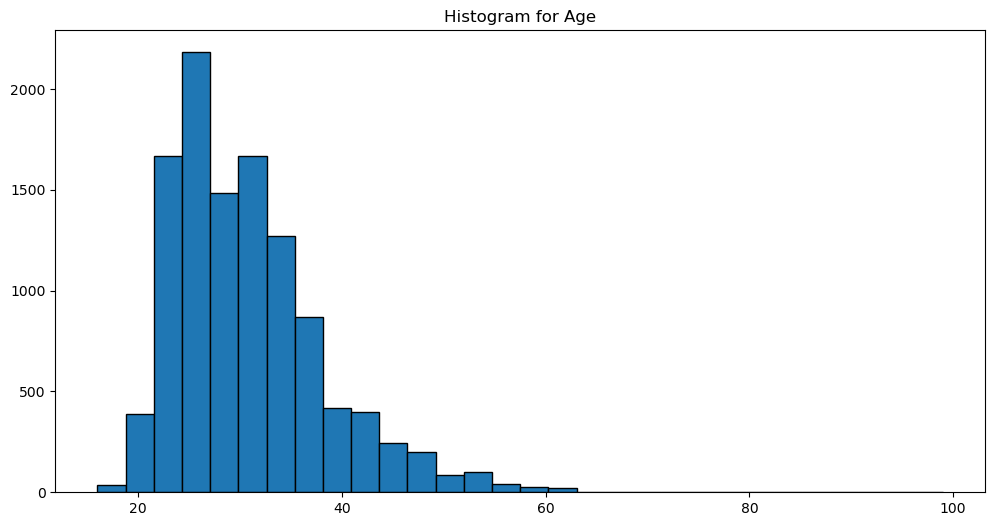

In [12]:
# Histogramme de la colonne Age
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Histogram for Age')
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


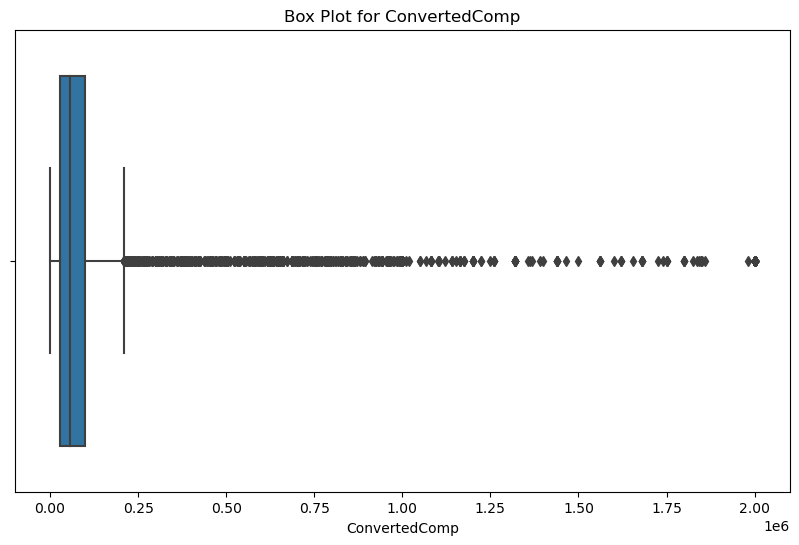

In [14]:
# Box plot pour la colonne ConvertedComp
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'])
plt.title('Box Plot for ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
# Calcul de l'IQR pour la colonne ConvertedComp
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f"Inter Quartile Range (IQR) for ConvertedComp: {IQR}")

Inter Quartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [16]:
# Calcul des bornes supérieure et inférieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: -82830.0, Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
# Identification du nombre d'outliers dans la colonne ConvertedComp
outliers_count = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)].shape[0]
print(f"Number of outliers in ConvertedComp: {outliers_count}")

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [19]:
# Création d'un nouveau dataframe en supprimant les outliers de la colonne ConvertedComp
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]


# Médiane de ConvertedComp avant la suppression des outliers
median_ConvertedComp_before = df['ConvertedComp'].median()
print(f"Median ConvertedComp before removing outliers: {median_ConvertedComp_before}")

# Médiane de ConvertedComp après la suppression des outliers
median_ConvertedComp_after = df_no_outliers['ConvertedComp'].median()
print(f"Median ConvertedComp after removing outliers: {median_ConvertedComp_after}")

# Identification du nombre d'outliers en dessous de Q1 pour la colonne Age
outliers_below_Q1_Age = df[df['Age'] < Q1].shape[0]
print(f"Number of outliers below Q1 in Age: {outliers_below_Q1_Age}")

# Calcul de la moyenne de ConvertedComp après la suppression des outliers
mean_ConvertedComp_after = df_no_outliers['ConvertedComp'].mean()
print(f"Mean ConvertedComp after removing outliers: {mean_ConvertedComp_after}")


Median ConvertedComp before removing outliers: 57745.0
Median ConvertedComp after removing outliers: 52704.0
Number of outliers below Q1 in Age: 11111
Mean ConvertedComp after removing outliers: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [21]:
# Calcul de la corrélation entre Age et toutes les autres colonnes numériques
correlation_age = df.corr()['Age']

# Exclure la colonne "Age" lors du calcul de la corrélation
correlation_age = df.drop('Age', axis=1).corrwith(df['Age'])

# Colonne avec une corrélation négative avec "Age"
negative_corr_column = correlation_age.idxmin()
print(f"Column with a negative correlation with 'Age': {negative_corr_column}, Correlation: {correlation_age[negative_corr_column]}")

# Colonne avec la corrélation la plus élevée avec "Age"
highest_corr_column = correlation_age.idxmax()
print(f"Column with the highest correlation with 'Age': {highest_corr_column}, Correlation: {correlation_age[highest_corr_column]}")


Column with a negative correlation with 'Age': CodeRevHrs, Correlation: -0.020469111970031026
Column with the highest correlation with 'Age': ConvertedComp, Correlation: 0.10538616072629153


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
